### I'm going to be running different base classification models to choose which one is the most suitable and best performing, and then take that model and refine it. The main metric I'll use to compare the models is AUC Score. I'm also displaying accuracy but it might not be as informative when dealing with imbalanced classes.

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', 200) # Display all columns

In [2]:
df = pd.read_parquet("../data/processed/churn_prediction_dataset.parquet")
df.head()

,cliente_vip,internet,cliente_edad,cliente_antiguedad,mrentabilidad,mrentabilidad_anual,mcomisiones,mactivos_margen,mpasivos_margen,cant_total_prod,tpaquete1,tpaquete2,tpaquete3,tpaquete4,tpaquete5,tpaquete6,tpaquete7,tpaquete8,tpaquete9,mdescubierto_preacordado,mcuentas_saldo,ctarjeta_debito_transacciones,mautoservicio,ctarjeta_visa,ctarjeta_visa_transacciones,mtarjeta_visa_consumo,ctarjeta_master,ctarjeta_master_transacciones,mtarjeta_master_consumo,cprestamos_personales,mprestamos_personales,cplazo_fijo,mplazo_fijo_dolares,mplazo_fijo_pesos,cfondos_comunes_inversion,mfondos_comunes_inversion_pesos,mfondos_comunes_inversion_dolares,ctitulos,mtitulos,cseguro_auto,cseguro_vivienda,cseguro_accidentes_personales,ccaja_seguridad,mbonos_corporativos,mmonedas_extranjeras,minversiones_otras,cplan_sueldo,mplan_sueldo,mplan_sueldo_manual,cplan_sueldo_transaccion,ccuenta_debitos_automaticos,mcuenta_debitos_automaticos,ctarjeta_visa_debitos_automaticos,mttarjeta_visa_debitos_automaticos,cpagodeservicios,mpagodeservicios,cpagomiscuentas,mpagomiscuentas,mcomisiones_mantenimiento,ccomisiones_otras,mcomisiones_otras,ccambio_monedas,ccambio_monedas_compra,mcambio_monedas_compra,ccambio_monedas_venta,mcambio_monedas_venta,ctransferencias_recibidas,mtransferencias_recibidas,ctransferencias_emitidas,mtransferencias_emitidas,cextraccion_autoservicio,mextraccion_autoservicio,ccheques_depositados,mcheques_depositados,ccheques_emitidos,mcheques_emitidos,ccheques_depositados_rechazados,mcheques_depositados_rechazados,ccheques_emitidos_rechazados,mcheques_emitidos_rechazados,thomebanking,chomebanking_transacciones,cautoservicio,cautoservicio_transacciones,tmovimientos_ultimos90dias,visa_marca_atraso,visa_mfinanciacion_limite,visa_msaldototal,visa_msaldopesos,visa_msaldodolares,visa_mconsumospesos,visa_mconsumosdolares,visa_mlimitecompra,visa_mpagado,visa_mpagospesos,visa_mpagosdolares,visa_mconsumototal,visa_cconsumos,visa_mpagominimo,clase_binaria,visa_tenure_days,tcuentas_2,visa_cuenta_estado_11.0,visa_cuenta_estado_12.0,visa_cuenta_estado_19.0,visa_cuenta_estado_unknown
0,0,1,44,72,3296.69,14455.27,579.66,910.65,1411.60,11,1,0,0,0,0,0,0,0,0,1.17,-460.04,2,2574.00,1,17,19451.75,1,18,17091.34,3,73704.79,0,0.0,0.0,0,0.0,0.0,0,0.00,0,1,0,0,0,0,0,1,56580.03,0.0,0,1,68.94,0,0.0,0,0.00,0,0.0,0.00,14,579.66,0,0,0.0,0,0.0,0,0.0,0,0.00,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0,0,0,116,0.0,63180.0,29994.31,32262.86,2830.47,14555.47,59.47,70200.0,0.0,-19632.60,0.00,14555.47,13.0,3837.6,0,4206.0,False,False,False,False,False
1,0,0,78,159,1032.18,10141.18,790.58,71.21,135.29,6,1,0,0,0,0,0,0,0,0,1.17,6301.72,0,0.00,1,1,174.33,1,0,0.00,0,0.00,0,0.0,0.0,0,0.0,0.0,0,0.00,0,0,0,0,0,0,0,0,0.00,0.0,0,0,0.00,0,0.0,0,0.00,0,0.0,833.97,4,790.58,0,0,0.0,0,0.0,0,0.0,1,351.00,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,1,0,0,17,0.0,63180.0,182.45,213.46,0.00,-11.55,4.22,70200.0,0.0,-2976.51,62.78,-11.55,2.0,35.1,0,6862.0,False,False,False,False,False
2,0,1,64,299,-52.34,4752.64,236.08,-422.18,175.66,7,1,0,0,0,0,0,0,0,0,1.17,45.63,0,0.00,1,8,11670.93,1,0,0.00,0,0.00,0,0.0,0.0,0,0.0,0.0,0,0.00,0,0,0,0,0,0,0,0,0.00,0.0,0,0,0.00,0,0.0,0,0.00,0,0.0,0.00,6,236.08,0,0,0.0,0,0.0,0,0.0,0,0.00,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,1,0,0,0,10,0.0,176904.0,10367.71,12130.22,0.00,6788.67,0.00,196560.0,0.0,-12753.00,0.00,6788.67,4.0,1977.3,0,10317.0,False,False,False,False,False
3,0,1,48,282,485.91,10676.87,1280.47,-1275.18,596.07,8,1,0,0,0,0,0,0,0,0,1.17,5429.85,4,4103.69,1,9,9840.21,1,14,12383.23,0,0.00,0,0.0,0.0,0,0.0,0.0,3,10509.33,0,0,0,0,0,0,0,0,0.00,0.0,0,4,5303.31,0,0.0,0,0.00,2,2460.0,833.97,18,1280.47,0,0,0.0,0,0.0,0,0.0,0,0.00,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,1,78,0,0,85,0.0,176904.0,6754.10,7433.72,468.57,2946.70,10.51,196560.0,0.0,-3685.76,0.00,2946.70,5.0,573.3,0,3581.0,False,False,False,False,False
4,0,1,45,171,5878.27,24298.75,64.38,22.11,4947.03,9,1,0,0,0,0,0,0,0,0,1.17,563006.87,10,4313.45,1,2,1496.03,1,0,0.00,0,0.00,1,351000.0,0.0,0,0.0,0.0,0,0.00,0,0,0,0,0,0,0,0,0.00,0.0,0,0,0.00,0,0.0,7,2171.89,1,

# Logistic Regresion

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import classification_report

# Features and target
X = df.drop(columns=["clase_binaria"])  # Exclude the target column
y = df["clase_binaria"]

# Define the Logistic Regression model with class balancing
log_reg_model = LogisticRegression(class_weight='balanced', random_state=12, max_iter=1000)

# Define StratifiedKFold for cross-validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=12)

# Perform stratified cross-validation with AUC scoring
cv_auc_scores = cross_val_score(log_reg_model, X, y, cv=skf, scoring='roc_auc')  # Using AUC as the metric

# Perform stratified cross-validation with Accuracy scoring
cv_accuracy_scores = cross_val_score(log_reg_model, X, y, cv=skf, scoring='accuracy')  # Using Accuracy as the metric

# Print Cross-Validation AUC Scores
print("Cross-Validation AUC Scores:", cv_auc_scores)

# Print Cross-Validation Accuracy Scores
print("Cross-Validation Accuracy Scores:", cv_accuracy_scores)

# Calculate and print the Mean AUC Score
print("Mean AUC Score:", cv_auc_scores.mean())

# Calculate and print the Mean Accuracy Score
print("Mean Accuracy Score:", cv_accuracy_scores.mean())

# Calculate and print the validation errors (1 - AUC score)
cv_auc_errors = 1 - cv_auc_scores
print("Validation Errors (AUC):", cv_auc_errors)
print("Mean Validation Error (AUC):", cv_auc_errors.mean())

# Calculate and print the validation errors (1 - accuracy score)
cv_accuracy_errors = 1 - cv_accuracy_scores
print("Validation Errors (Accuracy):", cv_accuracy_errors)
print("Mean Validation Error (Accuracy):", cv_accuracy_errors.mean())

# Fit the Logistic Regression model on the entire dataset (optional, for evaluation purposes)
log_reg_model.fit(X, y)
y_pred = log_reg_model.predict(X)

# Generate classification report
print("\nClassification Report:")
print(classification_report(y, y_pred, target_names=["No Churn", "Churn"]))


/Users/juanignaciomonge/Desktop/Repositories/uba-assessment-churn-prediction/venv_tp_final_ds/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/juanignaciomonge/Desktop/Repositories/uba-assessment-churn-prediction/venv_tp_final_ds/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Pl

Cross-Validation AUC Scores: [0.86729492 0.86231764 0.86568565 0.879599   0.85825859]
Cross-Validation Accuracy Scores: [0.79827207 0.80790745 0.80227858 0.79958411 0.80090206]
Mean AUC Score: 0.8666311594130498
Mean Accuracy Score: 0.801788857898732
Validation Errors (AUC): [0.13270508 0.13768236 0.13431435 0.120401   0.14174141]
Mean Validation Error (AUC): 0.1333688405869503
Validation Errors (Accuracy): [0.20172793 0.19209255 0.19772142 0.20041589 0.19909794]
Mean Validation Error (Accuracy): 0.19821114210126806

Classification Report:
              precision    recall  f1-score   support

    No Churn       1.00      0.80      0.89    168887
       Churn       0.04      0.83      0.08      1835

    accuracy                           0.80    170722
   macro avg       0.52      0.82      0.49    170722
weighted avg       0.99      0.80      0.88    170722



/Users/juanignaciomonge/Desktop/Repositories/uba-assessment-churn-prediction/venv_tp_final_ds/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# Random Forest

In [4]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import classification_report, roc_auc_score

# Features and target
X = df.drop(columns=["clase_binaria"])  # Exclude the target column
y = df["clase_binaria"]

# Define the Random Forest model with class balancing
rf_model = RandomForestClassifier(class_weight='balanced', random_state=12, n_estimators=100)

# Define StratifiedKFold for cross-validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=12)

# Perform stratified cross-validation with AUC scoring
cv_auc_scores = cross_val_score(rf_model, X, y, cv=skf, scoring='roc_auc')  # Using AUC as the metric

# Perform stratified cross-validation with Accuracy scoring
cv_accuracy_scores = cross_val_score(rf_model, X, y, cv=skf, scoring='accuracy')  # Using Accuracy as the metric

# Print Cross-Validation AUC Scores
print("Cross-Validation AUC Scores:", cv_auc_scores)

# Print Cross-Validation Accuracy Scores
print("Cross-Validation Accuracy Scores:", cv_accuracy_scores)

# Calculate and print the Mean AUC Score
print("Mean AUC Score:", cv_auc_scores.mean())

# Calculate and print the Mean Accuracy Score
print("Mean Accuracy Score:", cv_accuracy_scores.mean())

# Calculate and print the validation errors (1 - AUC score)
cv_auc_errors = 1 - cv_auc_scores
print("Validation Errors (AUC):", cv_auc_errors)
print("Mean Validation Error (AUC):", cv_auc_errors.mean())

# Calculate and print the validation errors (1 - accuracy score)
cv_accuracy_errors = 1 - cv_accuracy_scores
print("Validation Errors (Accuracy):", cv_accuracy_errors)
print("Mean Validation Error (Accuracy):", cv_accuracy_errors.mean())

# Fit the Random Forest model on the entire dataset (optional, for evaluation purposes)
rf_model.fit(X, y)
y_pred = rf_model.predict(X)

# Generate classification report
print("\nClassification Report:")
print(classification_report(y, y_pred, target_names=["No Churn", "Churn"]))


Cross-Validation AUC Scores: [0.91600042 0.90234272 0.90382981 0.91021949 0.91743039]
Cross-Validation Accuracy Scores: [0.99165324 0.99182896 0.99144799 0.99133083 0.99171157]
Mean AUC Score: 0.9099645651216312
Mean Accuracy Score: 0.9915945203713201
Validation Errors (AUC): [0.08399958 0.09765728 0.09617019 0.08978051 0.08256961]
Mean Validation Error (AUC): 0.0900354348783688
Validation Errors (Accuracy): [0.00834676 0.00817104 0.00855201 0.00866917 0.00828843]
Mean Validation Error (Accuracy): 0.00840547962867988

Classification Report:
              precision    recall  f1-score   support

    No Churn       1.00      1.00      1.00    168887
       Churn       1.00      1.00      1.00      1835

    accuracy                           1.00    170722
   macro avg       1.00      1.00      1.00    170722
weighted avg       1.00      1.00      1.00    170722



# AdaBoost

In [5]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import classification_report

# Features and target
X = df.drop(columns=["clase_binaria"])  # Exclude the target column
y = df["clase_binaria"]

# Define a weak base learner for AdaBoost (e.g., a simple decision tree)
base_model = DecisionTreeClassifier(max_depth=1, random_state=12)  # Weak learner

# Define the AdaBoost model with the base learner
ada_model = AdaBoostClassifier(n_estimators=100, random_state=12)

# Define StratifiedKFold for cross-validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=12)

# Perform stratified cross-validation with AUC scoring
cv_auc_scores = cross_val_score(ada_model, X, y, cv=skf, scoring='roc_auc')  # Using AUC as the metric

# Perform stratified cross-validation with Accuracy scoring
cv_accuracy_scores = cross_val_score(ada_model, X, y, cv=skf, scoring='accuracy')  # Using Accuracy as the metric

# Print Cross-Validation AUC Scores
print("Cross-Validation AUC Scores:", cv_auc_scores)

# Print Cross-Validation Accuracy Scores
print("Cross-Validation Accuracy Scores:", cv_accuracy_scores)

# Calculate and print the Mean AUC Score
print("Mean AUC Score:", cv_auc_scores.mean())

# Calculate and print the Mean Accuracy Score
print("Mean Accuracy Score:", cv_accuracy_scores.mean())

# Calculate and print the validation errors (1 - AUC score)
cv_auc_errors = 1 - cv_auc_scores
print("Validation Errors (AUC):", cv_auc_errors)
print("Mean Validation Error (AUC):", cv_auc_errors.mean())

# Calculate and print the validation errors (1 - accuracy score)
cv_accuracy_errors = 1 - cv_accuracy_scores
print("Validation Errors (Accuracy):", cv_accuracy_errors)
print("Mean Validation Error (Accuracy):", cv_accuracy_errors.mean())

# Fit the AdaBoost model on the entire dataset (optional, for evaluation purposes)
ada_model.fit(X, y)
y_pred = ada_model.predict(X)

# Generate classification report
print("\nClassification Report:")
print(classification_report(y, y_pred, target_names=["No Churn", "Churn"]))

/Users/juanignaciomonge/Desktop/Repositories/uba-assessment-churn-prediction/venv_tp_final_ds/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/juanignaciomonge/Desktop/Repositories/uba-assessment-churn-prediction/venv_tp_final_ds/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/juanignaciomonge/Desktop/Repositories/uba-assessment-churn-prediction/venv_tp_final_ds/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/juanignaciom

Cross-Validation AUC Scores: [0.93922317 0.93272067 0.93104158 0.95054331 0.93666776]
Cross-Validation Accuracy Scores: [0.99127251 0.99115537 0.99130155 0.99138941 0.99086223]
Mean AUC Score: 0.938039299054009
Mean Accuracy Score: 0.9911962135199094
Validation Errors (AUC): [0.06077683 0.06727933 0.06895842 0.04945669 0.06333224]
Mean Validation Error (AUC): 0.061960700945991175
Validation Errors (Accuracy): [0.00872749 0.00884463 0.00869845 0.00861059 0.00913777]
Mean Validation Error (Accuracy): 0.00880378648009077


/Users/juanignaciomonge/Desktop/Repositories/uba-assessment-churn-prediction/venv_tp_final_ds/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(



Classification Report:
              precision    recall  f1-score   support

    No Churn       0.99      1.00      1.00    168887
       Churn       0.72      0.32      0.45      1835

    accuracy                           0.99    170722
   macro avg       0.86      0.66      0.72    170722
weighted avg       0.99      0.99      0.99    170722



# XGBoost

XGBoost is the best performing classificator. Mean AUC Score: 0.94308  
I'll be refining this model.
Also, I'll be identifying one true positive, one true negative, one false positive, and one false negative, by comparing the predictions of the model (y_pred) against the true labels (y). I'll use these values to display them in a waterfall plot.
I'm also plotting the most important features in the model.

In [6]:
import xgboost as xgb
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import classification_report, roc_auc_score

# Features and target
X = df.drop(columns=["clase_binaria"])  # Exclude the target column
y = df["clase_binaria"]

# Define the XGBoost model with class balancing
xgb_model = xgb.XGBClassifier(scale_pos_weight=1, random_state=12, n_estimators=100)

# Define StratifiedKFold for cross-validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=12)

# Perform stratified cross-validation with AUC scoring
cv_auc_scores = cross_val_score(xgb_model, X, y, cv=skf, scoring='roc_auc')  # Using AUC as the metric

# Perform stratified cross-validation with Accuracy scoring
cv_accuracy_scores = cross_val_score(xgb_model, X, y, cv=skf, scoring='accuracy')  # Using Accuracy as the metric

# Print Cross-Validation AUC Scores
print("Cross-Validation AUC Scores:", cv_auc_scores)

# Print Cross-Validation Accuracy Scores
print("Cross-Validation Accuracy Scores:", cv_accuracy_scores)

# Calculate and print the Mean AUC Score
print("Mean AUC Score:", cv_auc_scores.mean())

# Calculate and print the Mean Accuracy Score
print("Mean Accuracy Score:", cv_accuracy_scores.mean())

# Calculate and print the validation errors (1 - AUC score)
cv_auc_errors = 1 - cv_auc_scores
print("Validation Errors (AUC):", cv_auc_errors)
print("Mean Validation Error (AUC):", cv_auc_errors.mean())

# Calculate and print the validation errors (1 - accuracy score)
cv_accuracy_errors = 1 - cv_accuracy_scores
print("Validation Errors (Accuracy):", cv_accuracy_errors)
print("Mean Validation Error (Accuracy):", cv_accuracy_errors.mean())

# Fit the XGBoost model on the entire dataset (optional, for evaluation purposes)
xgb_model.fit(X, y)
y_pred = xgb_model.predict(X)

# Generate classification report
print("\nClassification Report:")
print(classification_report(y, y_pred, target_names=["No Churn", "Churn"]))


Cross-Validation AUC Scores: [0.94908695 0.93736826 0.93692288 0.94576328 0.94626348]
Cross-Validation Accuracy Scores: [0.99220969 0.99232684 0.99253163 0.99206303 0.99218018]
Mean AUC Score: 0.9430809684022231
Mean Accuracy Score: 0.9922622742705286
Validation Errors (AUC): [0.05091305 0.06263174 0.06307712 0.05423672 0.05373652]
Mean Validation Error (AUC): 0.05691903159777691
Validation Errors (Accuracy): [0.00779031 0.00767316 0.00746837 0.00793697 0.00781982]
Mean Validation Error (Accuracy): 0.007737725729471445

Classification Report:
              precision    recall  f1-score   support

    No Churn       1.00      1.00      1.00    168887
       Churn       0.96      0.62      0.76      1835

    accuracy                           1.00    170722
   macro avg       0.98      0.81      0.88    170722
weighted avg       1.00      1.00      1.00    170722



Now plot waterfall and violin for important features on this model

In [9]:
# Temporarily display the full list of columns
pd.set_option('display.max_rows', None)  # Show all rows
print(X.dtypes)

# Reset to default after viewing
# pd.reset_option('display.max_rows')

cliente_vip                             int64
internet                                int64
cliente_edad                            int64
cliente_antiguedad                      int64
mrentabilidad                         float64
mrentabilidad_anual                   float64
mcomisiones                           float64
mactivos_margen                       float64
mpasivos_margen                       float64
cant_total_prod                         int64
tpaquete1                               int64
tpaquete2                               int64
tpaquete3                               int64
tpaquete4                               int64
tpaquete5                               int64
tpaquete6                               int64
tpaquete7                               int64
tpaquete8                               int64
tpaquete9                               int64
mdescubierto_preacordado              float64
mcuentas_saldo                        float64
ctarjeta_debito_transacciones     

In [10]:
# Boolean columns (bool) need to be converted to integers for SHAP to process them:
X = X.astype({col: 'int64' for col in X.select_dtypes(include=['bool']).columns})


In [11]:
import shap

# Create the SHAP explainer using the trained XGBoost model
explainer = shap.Explainer(xgb_model, X)

# Calculate SHAP values for the entire dataset
shap_values = explainer(X)


/Users/juanignaciomonge/Desktop/Repositories/uba-assessment-churn-prediction/venv_tp_final_ds/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
100%|===================| 170381/170722 [06:16<00:00]        

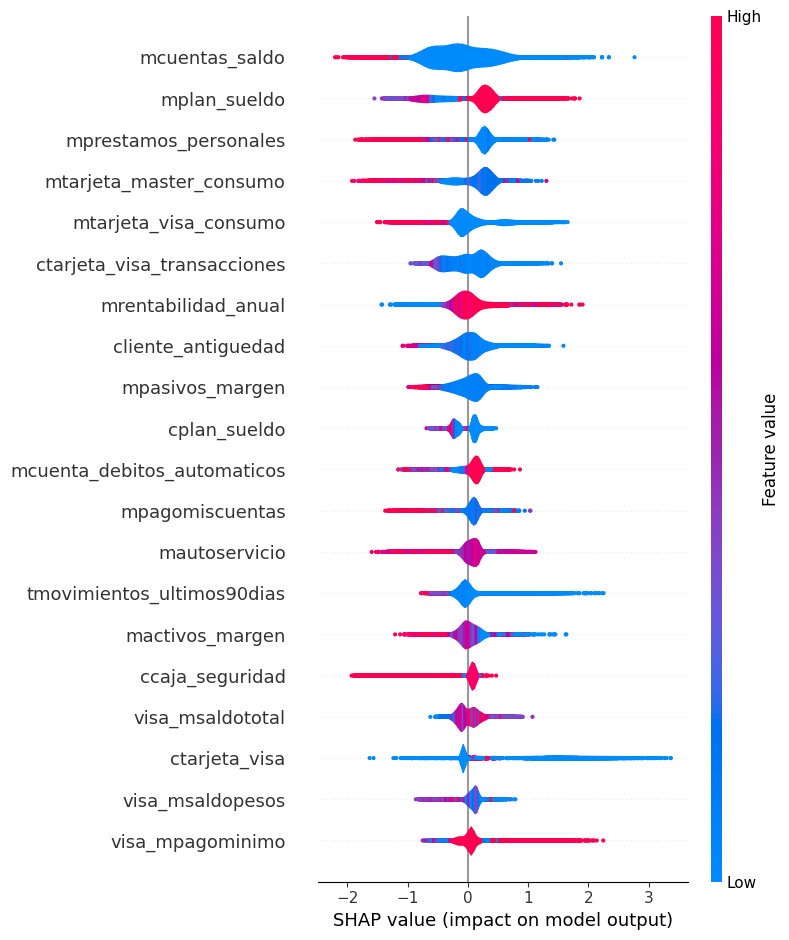

In [12]:
# Plot the summary plot (violin-style)
shap.summary_plot(shap_values, X, plot_type="violin")

I'll be identifying one true positive, one true negative, one false positive, and one false negative, by compareing the predictions of the model (y_pred) against the true labels (y). I'll use these values to display them in a waterfall plot.

In [13]:
y_prob = xgb_model.predict_proba(X)[:, 1]  # Probability of the positive class
y_pred = xgb_model.predict(X)             # Predicted class labels


In [14]:
from sklearn.metrics import confusion_matrix

# Generate the confusion matrix
conf_matrix = confusion_matrix(y, y_pred)

# Print the confusion matrix with labels
print("Confusion Matrix:")
print(f"                Predicted No   Predicted Yes")
print(f"Actual No     TN = {conf_matrix[0, 0]}    FP = {conf_matrix[0, 1]}")
print(f"Actual Yes    FN = {conf_matrix[1, 0]}    TP = {conf_matrix[1, 1]}")


Confusion Matrix:
                Predicted No   Predicted Yes
Actual No     TN = 168842    FP = 45
Actual Yes    FN = 691    TP = 1144


In [15]:
# Convert 'y' and 'y_pred' to a DataFrame for filtering
import pandas as pd

results_df = pd.DataFrame({
    "true_label": y,
    "predicted_label": y_pred,
    "probability": y_prob
})

# Identify cases
true_positive = results_df[(results_df["true_label"] == 1) & (results_df["predicted_label"] == 1)].iloc[0]
true_negative = results_df[(results_df["true_label"] == 0) & (results_df["predicted_label"] == 0)].iloc[0]
false_positive = results_df[(results_df["true_label"] == 0) & (results_df["predicted_label"] == 1)].iloc[0]
false_negative = results_df[(results_df["true_label"] == 1) & (results_df["predicted_label"] == 0)].iloc[0]

print("True Positive:", true_positive)
print("True Negative:", true_negative)
print("False Positive:", false_positive)
print("False Negative:", false_negative)


True Positive: true_label         1.000000
predicted_label    1.000000
probability        0.527972
Name: 317, dtype: float64
True Negative: true_label         0.000000
predicted_label    0.000000
probability        0.000409
Name: 0, dtype: float64
False Positive: true_label         0.000000
predicted_label    1.000000
probability        0.708994
Name: 11216, dtype: float64
False Negative: true_label         1.000000
predicted_label    0.000000
probability        0.150404
Name: 395, dtype: float64


In [16]:
# Get the row indices
tp_index = true_positive.name
tn_index = true_negative.name
fp_index = false_positive.name
fn_index = false_negative.name


In [17]:
tp_index

np.int64(317)

In [18]:
y[fn_index]

np.int64(1)

In [19]:
y_pred[309]

np.int64(0)

In [20]:
X.iloc[309]

cliente_vip                               0.00
internet                                  1.00
cliente_edad                             58.00
cliente_antiguedad                      299.00
mrentabilidad                          1356.05
mrentabilidad_anual                   13681.28
mcomisiones                             298.45
mactivos_margen                         299.04
mpasivos_margen                         604.89
cant_total_prod                          10.00
tpaquete1                                 1.00
tpaquete2                                 0.00
tpaquete3                                 0.00
tpaquete4                                 0.00
tpaquete5                                 0.00
tpaquete6                                 0.00
tpaquete7                                 0.00
tpaquete8                                 0.00
tpaquete9                                 0.00
mdescubierto_preacordado                  1.17
mcuentas_saldo                         2633.75
ctarjeta_debi

In [21]:
print("Churn: 1 - No churn: 0")
print(f"True positive - real: {y.iloc[tp_index]}, prediction: {y_pred[tp_index]}")
print(f"True negative - real: {y.iloc[tn_index]}, prediction: {y_pred[tn_index]}")
print(f"False positive - real: {y.iloc[fp_index]}, prediction: {y_pred[fp_index]}")
print(f"False negative - real: {y.iloc[fn_index]}, prediction: {y_pred[fn_index]}")


Churn: 1 - No churn: 0
True positive - real: 1, prediction: 1
True negative - real: 0, prediction: 0
False positive - real: 0, prediction: 1
False negative - real: 1, prediction: 0


In [22]:
X.iloc[tp_index]

cliente_vip                               0.00
internet                                  1.00
cliente_edad                             48.00
cliente_antiguedad                       33.00
mrentabilidad                          2970.86
mrentabilidad_anual                   25161.91
mcomisiones                              46.19
mactivos_margen                         920.33
mpasivos_margen                        1579.39
cant_total_prod                           9.00
tpaquete1                                 1.00
tpaquete2                                 0.00
tpaquete3                                 0.00
tpaquete4                                 0.00
tpaquete5                                 0.00
tpaquete6                                 0.00
tpaquete7                                 1.00
tpaquete8                                 0.00
tpaquete9                                 0.00
mdescubierto_preacordado                  1.17
mcuentas_saldo                        -6239.70
ctarjeta_debi

100%|===================| 170343/170722 [06:18<00:00]        

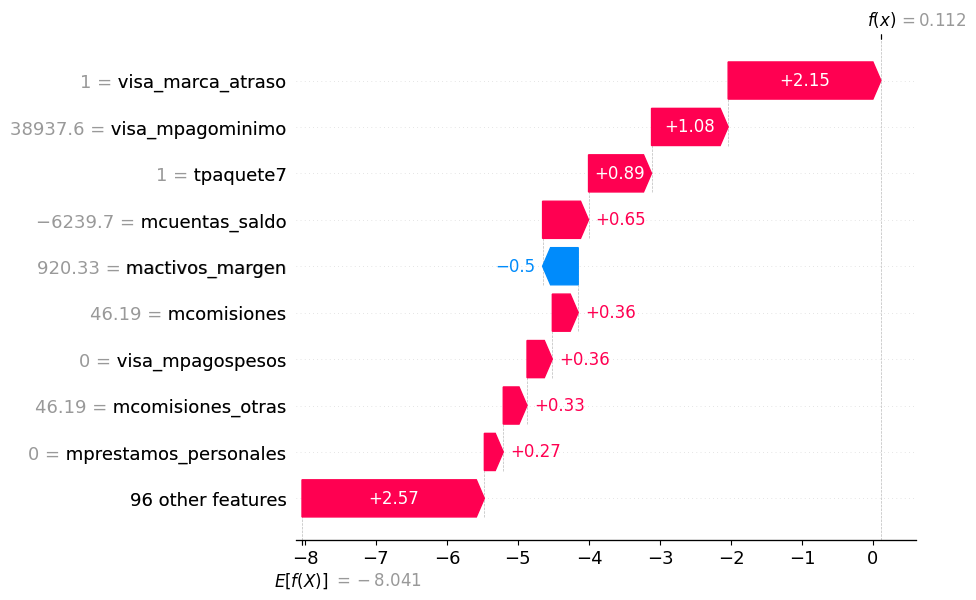

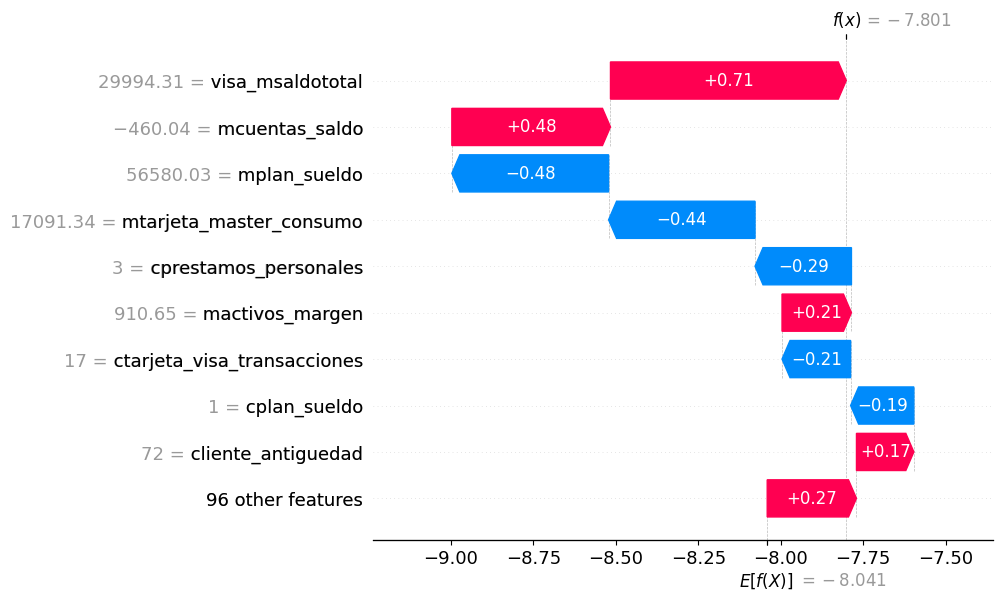

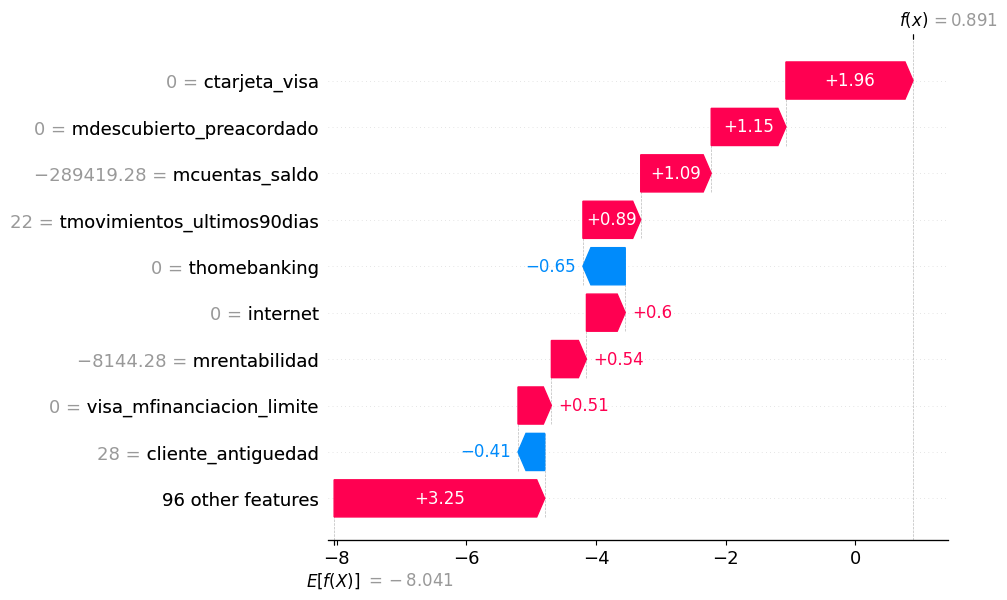

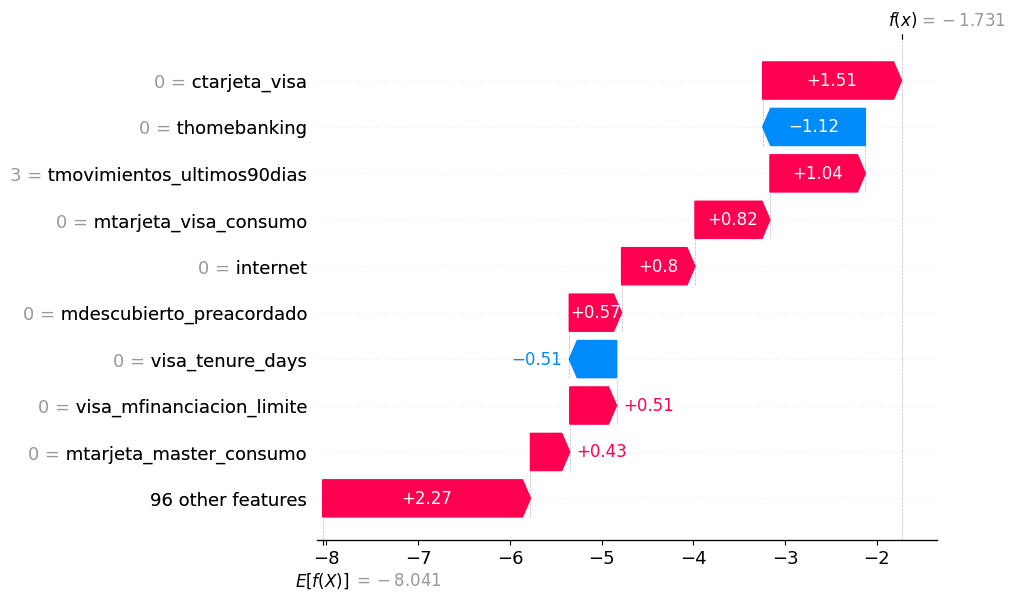

In [23]:
# Generate SHAP values for the entire dataset
shap_values = explainer(X)

# Plot waterfall plots for each case
shap.waterfall_plot(shap_values[tp_index], show=True, max_display=10)
shap.waterfall_plot(shap_values[tn_index], show=True, max_display=10)
shap.waterfall_plot(shap_values[fp_index], show=True, max_display=10)
shap.waterfall_plot(shap_values[fn_index], show=True, max_display=10)


I want to understand in more depth why my model has false negative, so I'll be waterfall plotting 10 additional cases of false negatives.

100%|===================| 170545/170722 [06:09<00:00]        

Waterfall plot for false negative at index: 395


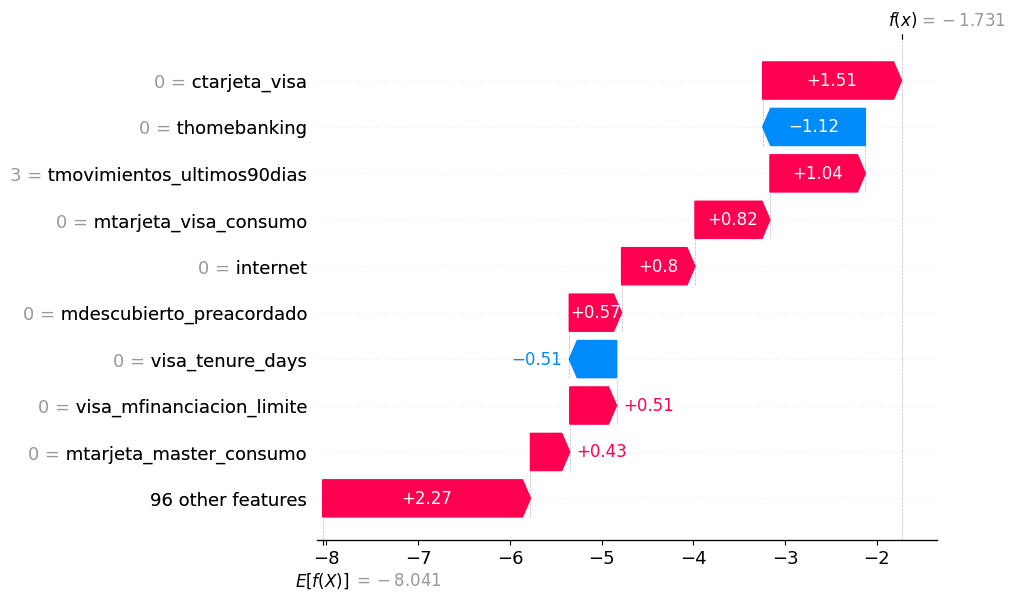

Waterfall plot for false negative at index: 1348


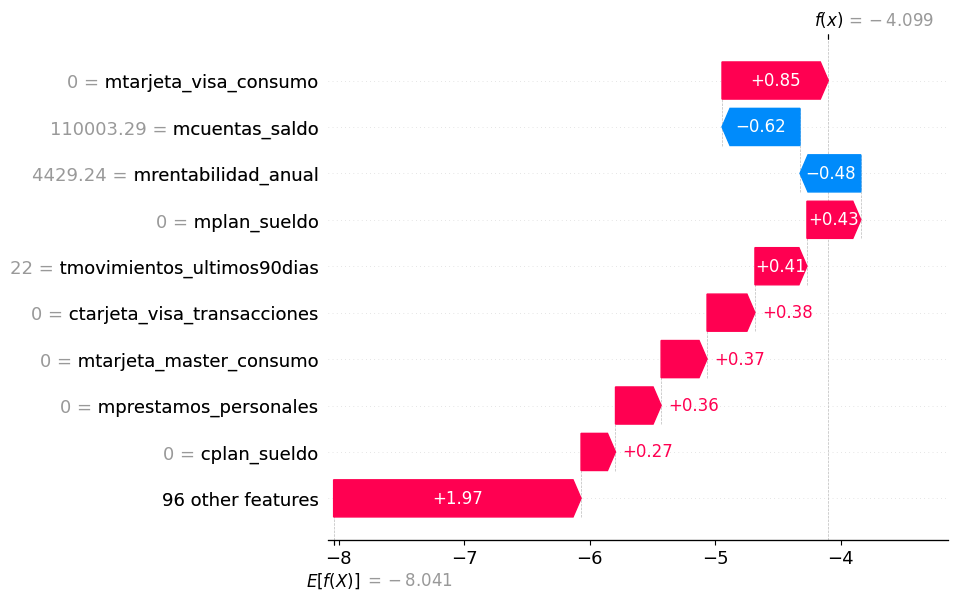

Waterfall plot for false negative at index: 2133


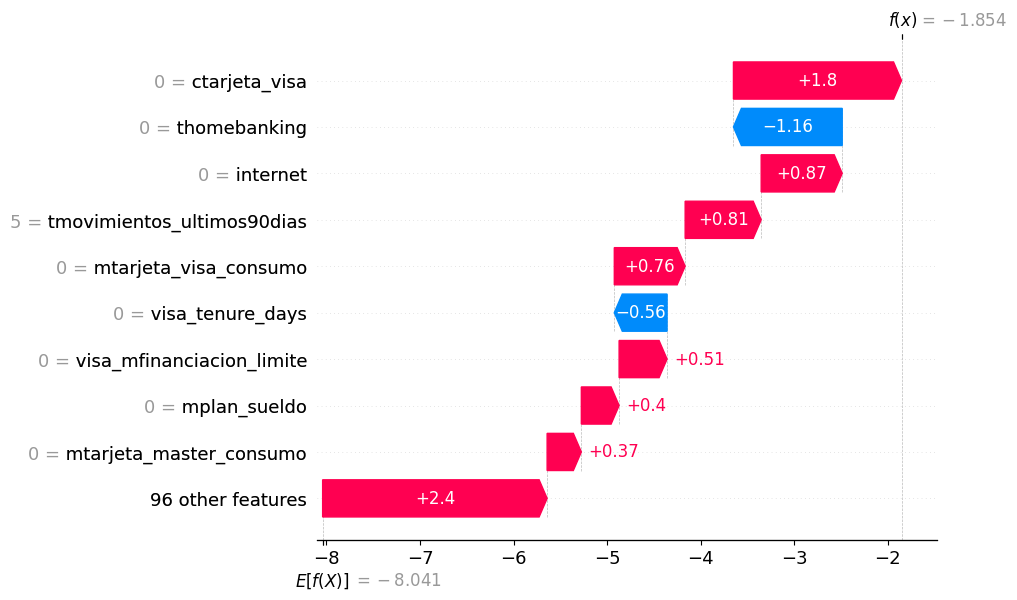

Waterfall plot for false negative at index: 2208


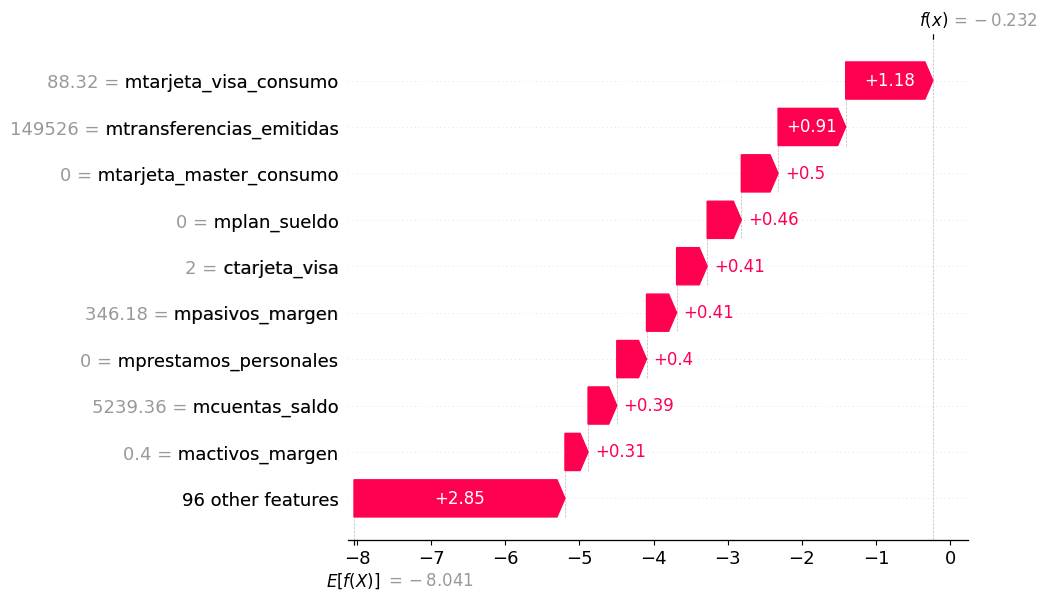

Waterfall plot for false negative at index: 2458


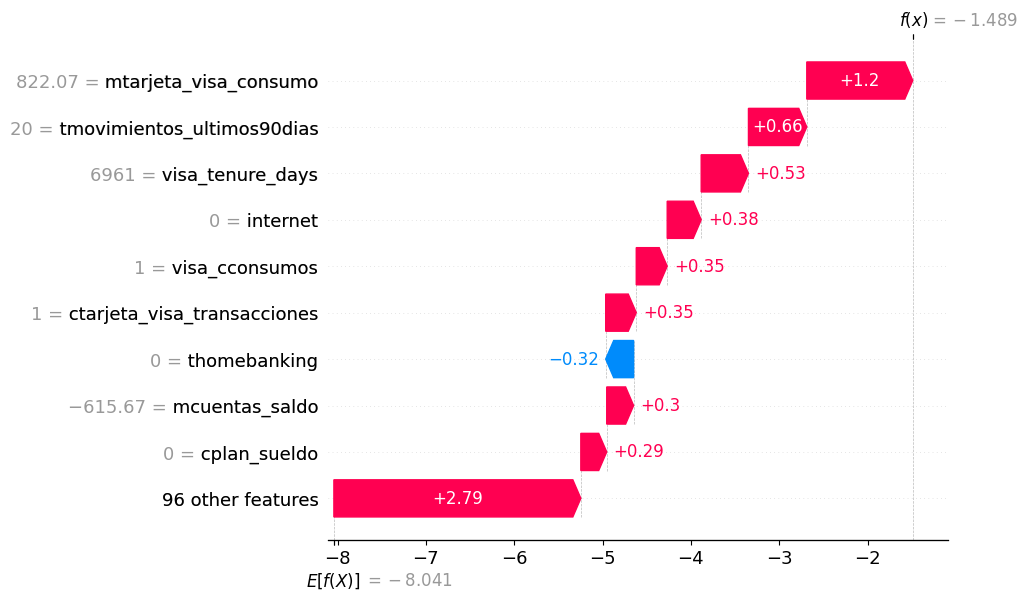

Waterfall plot for false negative at index: 3103


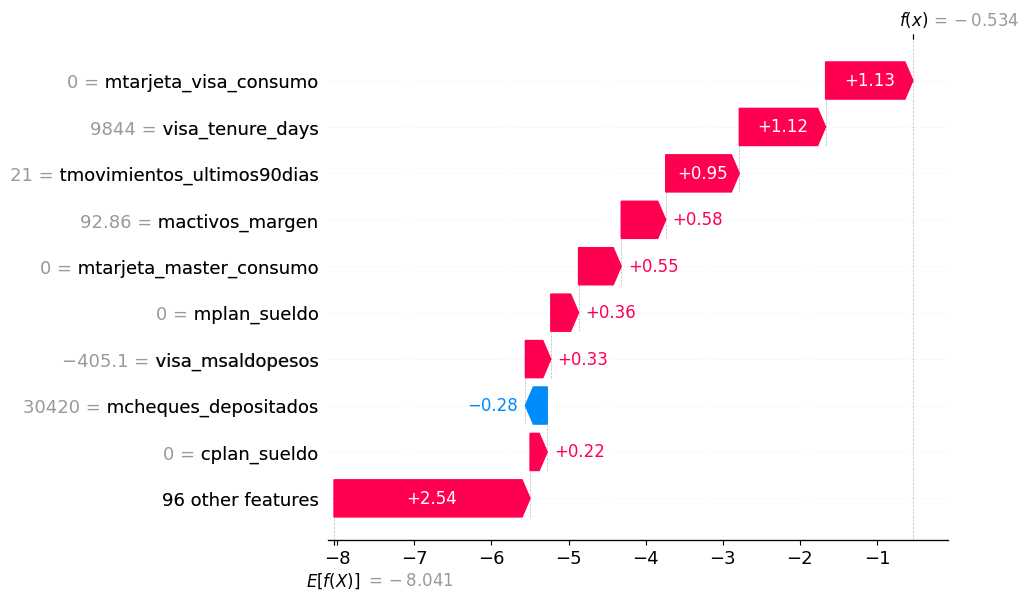

Waterfall plot for false negative at index: 3726


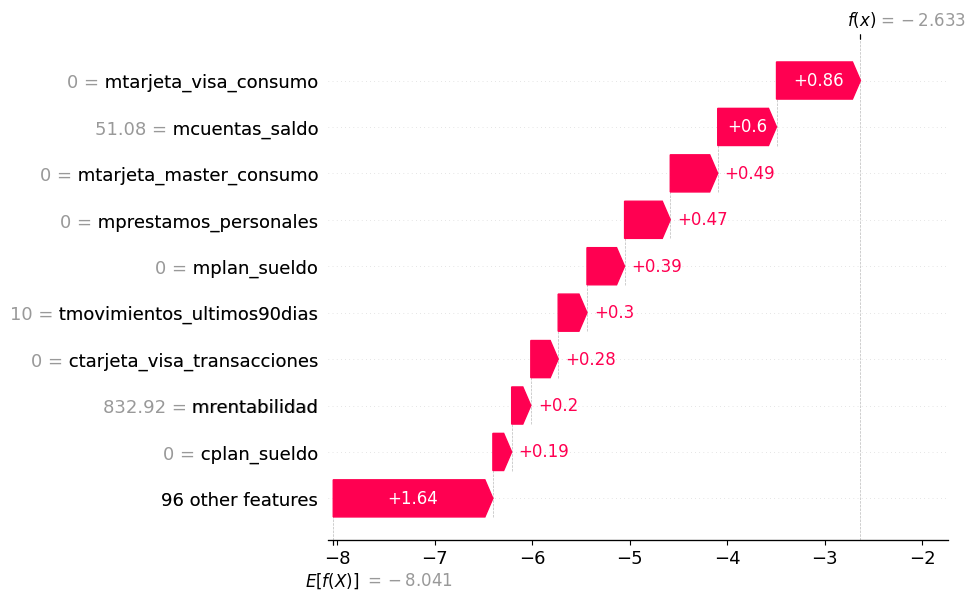

Waterfall plot for false negative at index: 3912


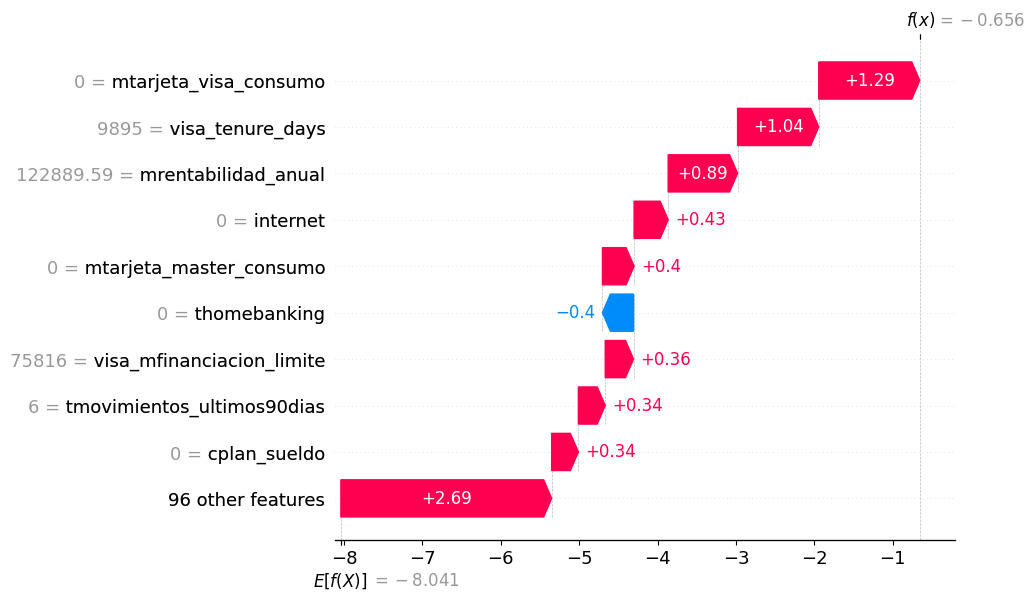

Waterfall plot for false negative at index: 3987


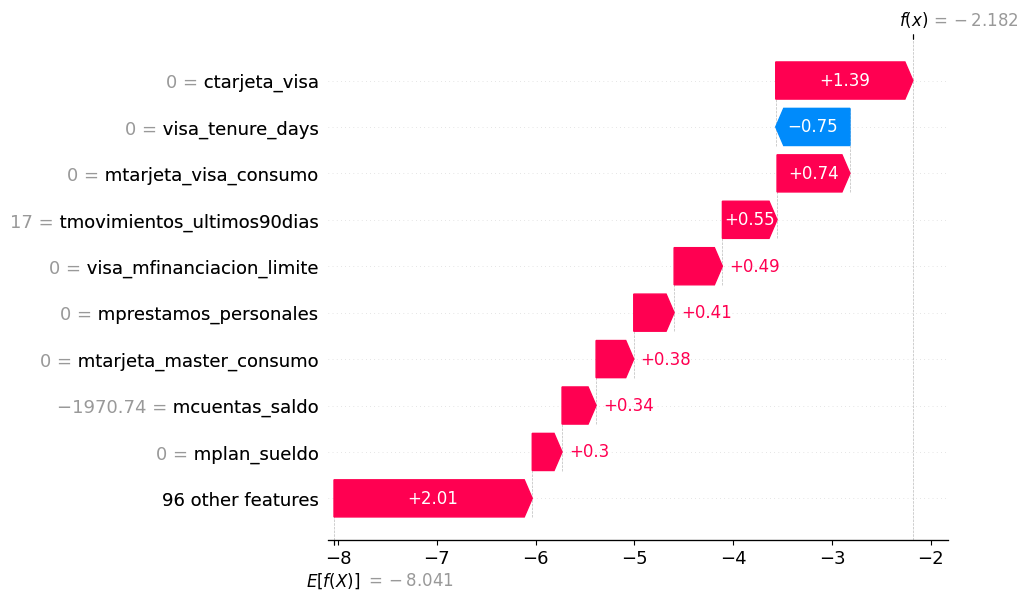

Waterfall plot for false negative at index: 4457


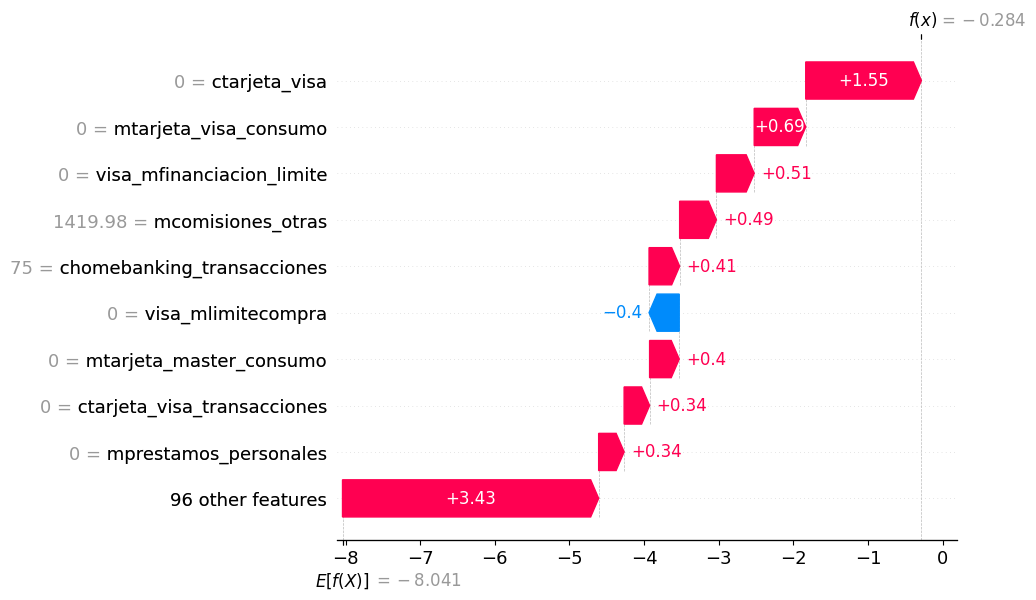

In [25]:
import shap

# Ensure you have the indices of false negatives
false_negatives_indices = np.where((y == 1) & (y_pred == 0))[0][:10]  # Adjust this if you already have `selected_fn_indices`

# Create the SHAP explainer for your trained model
explainer = shap.Explainer(xgb_model, X)  # Ensure `xgb_model` and `X` are defined
shap_values = explainer(X)  # Calculate SHAP values for the entire dataset

# Loop through each false negative and plot the waterfall
for idx in false_negatives_indices:
    print(f"Waterfall plot for false negative at index: {idx}")
    shap.waterfall_plot(shap_values[idx], max_display=10)  # Display top 10 features
